In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
accounts = pd.read_csv('accounts.csv')
posts = pd.read_csv('posts.csv')
followers = pd.read_csv('sources_for_followers.csv')

Let's have a look at each dataset

In [3]:
display(posts.shape)
display(posts.head(2))

(1138, 5)

,id,created_time,profile_id,text_original,comments_count
0,2318039031731205,2023-04-24 12:29:35+00,100068846905135,Smerenia pleacă din inima ta,0
1,2318026655065776,2023-04-24 12:07:02+00,100068846905135,# Sfântul în Arsenie Boca # Nu ignora puneţi o...,22


In [4]:
display(accounts.shape)
display(accounts.head(2))

(30, 9)

,id,username,full_name,description,is_verified,restricted,_id,_status,id_alt
0,100063695660293,ukraina.ru,Украина.ру,Информационно-аналитическое издание «Украина.ру»,False,NaN,378,downloaded,NaN
1,144698628932572,tassagency,ТАСС,"Информационное агентство России ""ТАСС"" - Крупн...",True,NaN,364,downloaded,NaN


In [5]:
display(followers.shape)
display(followers.head(2))

(30, 2)

,_id,followers_count
0,378,38000
1,364,761570


Okay, first things first, we'll merge the `posts` and `accounts` dataframes. Now, the key names for joining these two dataframes are different, so let's rename column `id` in `accounts` to `profile_id`.

In [6]:
# rename 'id' in 'accounts' to 'profile_id'
accounts.rename(columns={'id': 'profile_id'}, inplace=True)
# merge the 'posts' and 'accounts'
posts_and_accounts = pd.merge(posts, accounts, how='left', left_on='profile_id', right_on='profile_id')

In [7]:
display(posts_and_accounts.shape)
display(posts_and_accounts.head(2))

(1138, 13)

,id,created_time,profile_id,text_original,comments_count,username,full_name,description,is_verified,restricted,_id,_status,id_alt
0,2318039031731205,2023-04-24 12:29:35+00,100068846905135,Smerenia pleacă din inima ta,0,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN
1,2318026655065776,2023-04-24 12:07:02+00,100068846905135,# Sfântul în Arsenie Boca # Nu ignora puneţi o...,22,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN


Okay, the merge seems good. 
Now, let's procceed with merging `posts_and_accounts` and `followers` dataframes

In [8]:
# Merge 'posts_and_accounts' and 'followers'
dataset = pd.merge(posts_and_accounts, followers, how='left', left_on='_id', right_on='_id')

Let's have a glimpse on a complete `dataset`

In [9]:
display(dataset.shape)
display(dataset.head(2))
display(dataset.tail(2))

(1138, 14)

,id,created_time,profile_id,text_original,comments_count,username,full_name,description,is_verified,restricted,_id,_status,id_alt,followers_count
0,2318039031731205,2023-04-24 12:29:35+00,100068846905135,Smerenia pleacă din inima ta,0,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0
1,2318026655065776,2023-04-24 12:07:02+00,100068846905135,# Sfântul în Arsenie Boca # Nu ignora puneţi o...,22,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0


,id,created_time,profile_id,text_original,comments_count,username,full_name,description,is_verified,restricted,_id,_status,id_alt,followers_count
1136,201497592672108,2023-04-22 07:57:01+00,100064898132087,Jelentősen csökkent a gáz- és az áramfogyasztá...,1,ambrusitalia,Ambasciata della Federazione Russa in Italia /...,Il profilo ufficiale dell'Ambasciata della Fed...,True,NaN,603.0,downloaded,NaN,38000.0
1137,20148557267331,2023-04-22 07:27:05+00,100064898132087,A Leopoldinát 1652-ben alapították Academia Na...,51,ambrusitalia,Ambasciata della Federazione Russa in Italia /...,Il profilo ufficiale dell'Ambasciata della Fed...,True,NaN,603.0,downloaded,NaN,38000.0


Below we can see that columns `restricted` and `id_alt` contain no values.
Therefore we can drop those since we can't gain any useful information for our analysis from those.

In [10]:
dataset.count()

id                 1138
created_time       1138
profile_id         1138
text_original      1138
comments_count     1138
username            943
full_name          1021
description         982
is_verified         904
restricted            0
_id                1021
_status            1021
id_alt                0
followers_count    1021
dtype: int64

In [11]:
dataset.drop('restricted', axis=1, inplace=True)

In [12]:
dataset.drop('id_alt', axis=1, inplace=True)

We can also drop `_id` and `_status` as they don't carry useful data for us atm.

In [13]:
dataset.drop('_id', axis=1, inplace=True)

In [14]:
dataset.drop('_status', axis=1, inplace=True)

Let's check how many entries contain null values and drop those

In [15]:
dataset.isnull().sum()

id                   0
created_time         0
profile_id           0
text_original        0
comments_count       0
username           195
full_name          117
description        156
is_verified        234
followers_count    117
dtype: int64

In [16]:
data = dataset.dropna()

Just so it is more clear to work with colunms I will rename `id` to `post_id`

In [17]:
data = data.rename(columns={'id': 'post_id'})

After dropping nulls, around 200 entries, we are now left with around 900 entries of a complete data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 1137
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          904 non-null    int64  
 1   created_time     904 non-null    object 
 2   profile_id       904 non-null    int64  
 3   text_original    904 non-null    object 
 4   comments_count   904 non-null    int64  
 5   username         904 non-null    object 
 6   full_name        904 non-null    object 
 7   description      904 non-null    object 
 8   is_verified      904 non-null    object 
 9   followers_count  904 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 77.7+ KB


In [19]:
data.head(3)

,post_id,created_time,profile_id,text_original,comments_count,username,full_name,description,is_verified,followers_count
0,2318039031731205,2023-04-24 12:29:35+00,100068846905135,Smerenia pleacă din inima ta,0,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,26000.0
1,2318026655065776,2023-04-24 12:07:02+00,100068846905135,# Sfântul în Arsenie Boca # Nu ignora puneţi o...,22,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,26000.0
2,2318008095067632,2023-04-24 11:35:01+00,100068846905135,🙏❤️Hristos a purtat crucea ca orice suflet car...,7,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,26000.0


Let's convert `created_time` to `datetime` so it is easier to work with time

In [20]:
data.loc[:, 'created_time'] = pd.to_datetime(data['created_time'])

Ok, now let's calculate the earliest and latest dates of post creation to understand time range

In [21]:
earliest_date = data['created_time'].min()
latest_date = data['created_time'].max()

print(f"Earliest 'created_time': {earliest_date}")
print(f"Latest 'created_time': {latest_date}")

Earliest 'created_time': 2022-12-01 11:56:58+00:00
Latest 'created_time': 2023-04-24 14:34:06+00:00


Let's create a histogram of `created_time` to see distribution of post creaation over time

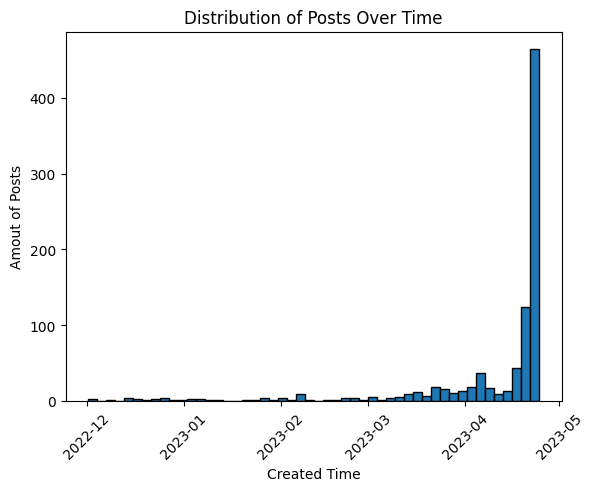

In [22]:
plt.hist(data['created_time'], bins=50, edgecolor='black')
plt.xlabel('Created Time')
plt.ylabel('Amout of Posts')
plt.title('Distribution of Posts Over Time')
plt.xticks(rotation=45)
plt.show()

On the histogram above we can see a big spike in created posts at the end of April, 2023.

Let's have a closer look at the "spike time" on a separate histogram

In [23]:
start_date = pd.Timestamp('2023-04-17', tz="UTC")
data_most_posts = data.loc[(data['created_time'] >= start_date) & (data['created_time'] <= latest_date)]
data_most_posts.shape

(624, 10)

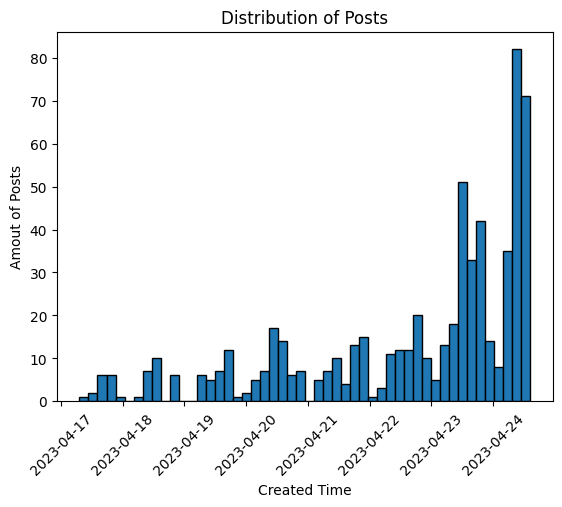

In [24]:
plt.hist(data_most_posts['created_time'], bins=50, edgecolor='black')
plt.xlabel('Created Time')
plt.ylabel('Amout of Posts')
plt.title('Distribution of Posts')
plt.xticks(rotation=45)
plt.show()

On the histogram above we can see that bigger chunk of the posts in our dataset were created around 20-24 of April, 2023

Let's have a look at which profiles created more posts during 'spike' period as well as for the whole time

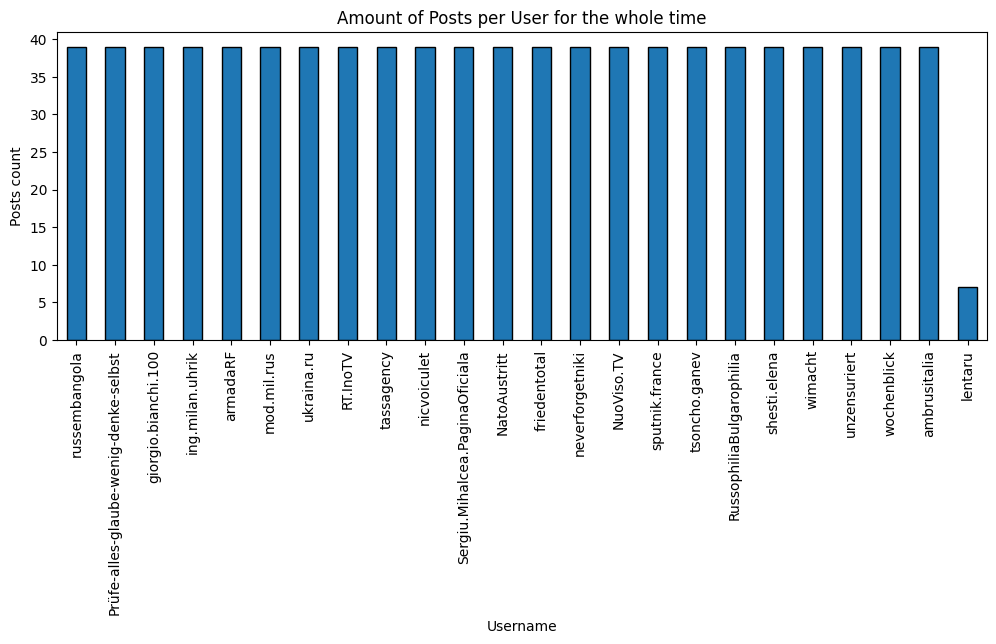

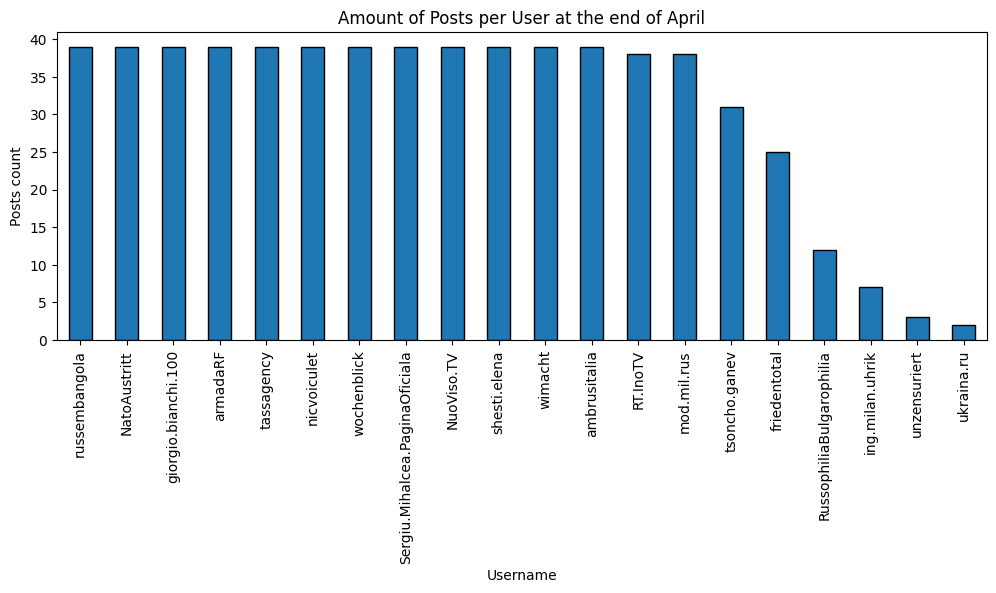

In [25]:
# During the whole time 
posts_to_profile_counts_all = data['username'].value_counts()

posts_to_profile_counts_all.plot(kind='bar', figsize=(12, 4), edgecolor='black')
plt.xlabel('Username')
plt.ylabel('Posts count')
plt.title('Amount of Posts per User for the whole time')
plt.show()

# During the end of April (spike time) 
posts_to_profile_counts_april = data_most_posts['username'].value_counts()

posts_to_profile_counts_april.plot(kind='bar', figsize=(12, 4), edgecolor='black')
plt.xlabel('Username')
plt.ylabel('Posts count')
plt.title('Amount of Posts per User at the end of April')
plt.show()

Interestingly, the distribution of posts created by users is pretty even in both cases, with no profiles being considerably more active than others.

Ok, let's now find out profiles with the most followers

In [26]:
profile_most_followers = data.drop_duplicates(subset=['username'])
profile_most_followers = profile_most_followers.sort_values(by='followers_count', ascending=False).head(10)

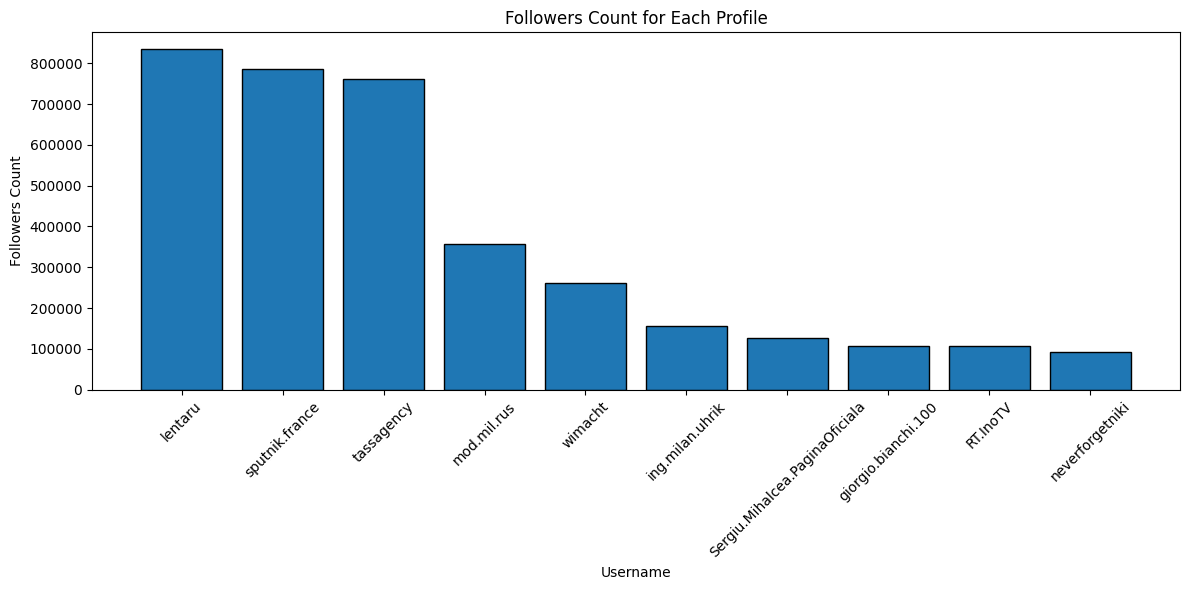

In [27]:
username = profile_most_followers['username']
followers_count = profile_most_followers['followers_count']

plt.figure(figsize=(12, 6))
plt.bar(username, followers_count, edgecolor='black')
plt.xlabel('Username')
plt.ylabel('Followers Count')
plt.title('Followers Count for Each Profile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that there's clearly 3 profiles with the biggest audience, those are: 

1. lentaru 
2. sputnik.france
3. tassagency

Let's find out if those are `verified`/official accounts.

In [28]:
three_most_followed_profiles = ['lentaru', 'sputnik.france', 'tassagency']

for profile in three_most_followed_profiles:
    print(profile_most_followers[profile_most_followers['username'] == profile]['is_verified'])

858    True
Name: is_verified, dtype: object
351    True
Name: is_verified, dtype: object
780    True
Name: is_verified, dtype: object


Yes, they are verified. 

Now, let's see how many comments do posts from 3 most followed and verified profiles get

In [29]:
posts_to_comments_verified = data[data['username'].isin(three_most_followed_profiles)].sort_values(by='comments_count', ascending=False)
posts_to_comments_verified.head(5)

,post_id,created_time,profile_id,text_original,comments_count,username,full_name,description,is_verified,followers_count
352,735241114614071,2023-01-26 06:11:34+00:00,138513176208770,India celebrates Republic Day with a military ...,7,sputnik.france,Sputnik France,Sputnik France est un média d'information alte...,True,786228.0
351,892544881941785,2023-02-02 14:07:51+00:00,138513176208770,US astronauts conduct spacewalk at ISS,4,sputnik.france,Sputnik France,Sputnik France est un média d'information alte...,True,786228.0
367,6482140645129467,2023-03-25 05:01:12+00:00,138513176208770,Russia launched a military satellite into orbi...,4,sputnik.france,Sputnik France,Sputnik France est un média d'information alte...,True,786228.0
354,6514664241877107,2023-04-05 08:01:13+00:00,138513176208770,Philippines' Kalibo Ostrich Farm offers a uniq...,3,sputnik.france,Sputnik France,Sputnik France est un média d'information alte...,True,786228.0
357,6512948488715349,2023-04-04 17:00:39+00:00,138513176208770,A rare snow leopard sharpens her claws and bas...,3,sputnik.france,Sputnik France,Sputnik France est un média d'information alte...,True,786228.0


Surprisingly they clearly get very few comments compare to the amonut of followers they have

Now, let's find the overall comment count for for posts.

In [30]:
posts_most_comments = data.sort_values(by='comments_count', ascending=False).head(20)
posts_most_comments = posts_most_comments[['post_id', 'profile_id', 'username', 'is_verified', 
                                           'followers_count', 'comments_count', 'created_time']]
posts_most_comments

,post_id,profile_id,username,is_verified,followers_count,comments_count,created_time
56,734562668126038,100049129852371,Prüfe-alles-glaube-wenig-denke-selbst,False,74000.0,447,2023-02-21 09:01:54+00:00
59,724211798875802,100049129852371,Prüfe-alles-glaube-wenig-denke-selbst,False,74000.0,405,2022-12-31 20:50:40+00:00
631,823098289181058,100063622184348,Sergiu.Mihalcea.PaginaOficiala,False,126000.0,341,2023-04-24 10:33:43+00:00
121,971856574169866,100069390481601,unzensuriert,False,58000.0,291,2022-12-27 17:00:10+00:00
155,921428155659740,100069390481601,unzensuriert,False,58000.0,190,2023-03-18 23:08:15+00:00
153,922367548972273,100069390481601,unzensuriert,False,58000.0,188,2023-04-15 20:34:29+00:00
133,945982783055944,100069390481601,unzensuriert,False,58000.0,186,2022-12-31 22:01:06+00:00
70,691777352335383,100049129852371,Prüfe-alles-glaube-wenig-denke-selbst,False,74000.0,173,2022-12-22 15:48:57+00:00
134,944930216486910,100069390481601,unzensuriert,False,58000.0,156,2022-12-22 14:02:06+00:00
126,961819484981102,100069390481601,unzensuriert,False,58000.0,148,2023-02-18 22:01:22+00:00


Looking at the table above (let's refer to it as Table 1), we can observe that the posts with the most comments originate from three profiles:

1. Prüfe-alles-glaube-wenig-denke-selbst
2. unzensuriert
3. Sergiu.Mihalcea.PaginaOficiala

These profiles have relatively low follower counts, ranging from 58,000 to 126,000, in contrast to the profiles in the table of most followed accounts with around 800,000 followers.

Additionally, none of these accounts are verified, which raises questions about the authenticity of their posts. This lack of verification increases the likelihood of unreliable information or even disinformation in their content, leading to more controversy and comments.

Interestingly, among the top 20 most commented posts, only three were posted during the end of April "spike" period.

Let's now scatter commments count to follower count to see distribution

<Axes: title={'center': 'Distribution of comment to followers count'}, xlabel='comments_count', ylabel='followers_count'>

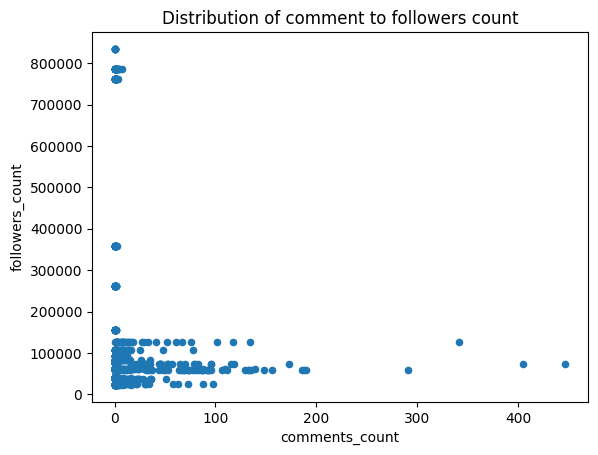

In [31]:
data.plot.scatter('comments_count', 'followers_count', title='Distribution of comment to followers count')

We can see that there are a couple of clear outliers, let's cut them off

<Axes: title={'center': 'Distribution of comment to followers count'}, xlabel='comments_count', ylabel='followers_count'>

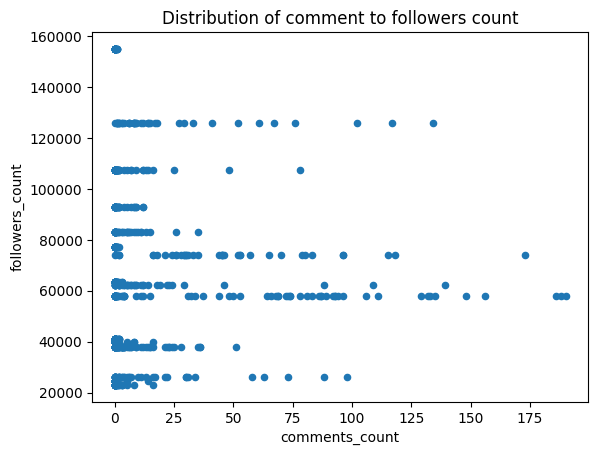

In [32]:
data_no_outliers = data[(data['comments_count'] < 200) & (data['followers_count'] < 200000)]
data_no_outliers.plot.scatter('comments_count', 'followers_count', title='Distribution of comment to followers count')

Now, let's find posts with the most comment count without the outliers and normalized by post age.

In [33]:
max_date = data_no_outliers.created_time.max()
post_age = data_no_outliers.created_time.apply(lambda x: pd.Timedelta(max_date - x, unit='minutes')).dt.seconds
comment_count_by_post_lifespan = data_no_outliers.comments_count / post_age
data['comment_count_by_post_lifespan'] = comment_count_by_post_lifespan
data = data.sort_values(by='comment_count_by_post_lifespan', ascending=False)
comments_nrz_no_outliars = data[['post_id', 'profile_id', 'username', 'is_verified', 
                                 'followers_count', 'comments_count', 'created_time', 
                                 'comment_count_by_post_lifespan']]
comments_nrz_no_outliars.head(20)

,post_id,profile_id,username,is_verified,followers_count,comments_count,created_time,comment_count_by_post_lifespan
134,944930216486910,100069390481601,unzensuriert,False,58000.0,156,2022-12-22 14:02:06+00:00,0.081250
469,887980615875297,233946916972658,friedentotal,False,62416.0,139,2023-02-18 14:04:45+00:00,0.078932
1130,201665605988640,100064898132087,ambrusitalia,True,38000.0,23,2023-04-22 14:29:09+00:00,0.077441
131,947783059965294,100069390481601,unzensuriert,False,58000.0,132,2023-01-05 13:59:34+00:00,0.063707
143,933161911005038,100069390481601,unzensuriert,False,58000.0,106,2022-12-29 13:59:30+00:00,0.051060
123,968582547471333,100069390481601,unzensuriert,False,58000.0,96,2023-03-21 14:00:10+00:00,0.047151
149,927028425122400,100069390481601,unzensuriert,False,58000.0,89,2023-01-23 14:00:40+00:00,0.044367
142,933615901125538,100069390481601,unzensuriert,False,58000.0,87,2023-02-27 13:57:40+00:00,0.039799
132,947207556635514,100069390481601,unzensuriert,False,58000.0,74,2023-04-20 14:00:04+00:00,0.036239
135,944879893351738,100069390481601,unzensuriert,False,58000.0,72,2023-03-01 13:59:11+00:00,0.034368



It is common knowledge that posts on social media have a spike in engagement usually close to post creation time.
In our case we can only measure engagememt in comment counts.

Better measure for engagemnt would be a size of the comment rate spike.
But, we don't have each comment creation date to run such analysis.

Therefore we make an assumption that the commenting rate is constant.
Under the assumption of the constant commenting rate older posts would have more engagement (comment count) just by being older.

Therefore, we made the normalization by post age and the results can be seen on the table above (let's call it Table 2)


In conclusion, we can see top 20 posts with highest engagement on raw data (Table 1) as well as on normalized data (Table 2)